In [6]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble methods
from xgboost import XGBClassifier  # Extreme Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron

# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Balancing techniques
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

ModuleNotFoundError: No module named 'imblearn'

In [3]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.4 MB/s eta 0:00:00


In [4]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.0 MB/s eta 0:00:00


In [5]:
!pip install tabulate

In [ ]:

from google.colab import files


uploaded = files.upload()

Saving encoded_df.csv to encoded_df.csv


In [7]:
#import  traain dataset
encoded_df = pd.read_csv("/content/encoded_df.csv")

encoded_df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,...,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,Month,Day,Year
0,46,1,1.0,85,38301,1,1,1,80006,4,...,7530.940993,9.0,0,12885.45235,6,16161.33381,0,12,16,2016
1,21,0,0.0,75,30445,0,1,1,15021,3,...,2966.024895,4.0,2,29429.45218,6,28691.96422,0,2,12,2015
2,49,0,0.0,87,38923,0,1,0,20158,1,...,6283.888333,3.0,0,21701.18195,6,22090.94758,1,12,6,2016
3,58,0,1.0,58,40605,1,0,0,15024,3,...,6169.747994,4.0,1,13198.27344,3,38329.58106,1,5,5,2016
4,38,1,1.0,95,36380,1,0,1,50034,1,...,4541.387150,7.0,1,38060.21122,2,25876.56319,0,10,27,2015


In [8]:
X=encoded_df.drop(columns=['fraud'])
y=encoded_df['fraud']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [9]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [10]:
continuous_vars = encoded_df.select_dtypes(include=['int64', 'float64']).columns
Continuous_Variables_in_X_train = continuous_vars

categorical_vars = encoded_df.select_dtypes(include=['object', 'category']).columns
Categorical_Variables_in_X_train = [var for var in categorical_vars if var != 'fraud']

Date_Month_Year= encoded_df.select_dtypes(include=['int32']).columns

# Display the variables
print("Continuous Variables in X_train:")
print(Continuous_Variables_in_X_train)
print("\nCategorical Variables in X train:")
print(Categorical_Variables_in_X_train)
print("\nDate_Month_Year:")
print(Date_Month_Year)

Continuous Variables in X_train:
Index(['age_of_driver', 'gender', 'marital_status', 'safty_rating',
       'annual_income', 'high_education_ind', 'address_change_ind',
       'living_status', 'zip_code', 'claim_day_of_week', 'accident_site',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud', 'Month', 'Day', 'Year'],
      dtype='object')

Categorical Variables in X train:
[]

Date_Month_Year:
Index([], dtype='object')


#### checking imbalance of response

In [11]:
print ('Total not committed fraud :  {} and its percentage is {} %'.format(encoded_df.fraud.value_counts()[0], round(encoded_df.fraud.value_counts()[0]/encoded_df.fraud.value_counts().sum()*100,2)) )
print ('Total committed fraud :  {} and its percentage is {} %'.format(encoded_df.fraud.value_counts()[1], round(encoded_df.fraud.value_counts()[1]/encoded_df.fraud.value_counts().sum()*100,2)) )

Total not committed fraud :  15040 and its percentage is 84.32 %
Total committed fraud :  2796 and its percentage is 15.68 %


## --------------------------------------------------------------------------------------------------------

In [12]:
df_backup = encoded_df.copy()
df_backup.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,...,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,Month,Day,Year
0,46,1,1.0,85,38301,1,1,1,80006,4,...,7530.940993,9.0,0,12885.45235,6,16161.33381,0,12,16,2016
1,21,0,0.0,75,30445,0,1,1,15021,3,...,2966.024895,4.0,2,29429.45218,6,28691.96422,0,2,12,2015
2,49,0,0.0,87,38923,0,1,0,20158,1,...,6283.888333,3.0,0,21701.18195,6,22090.94758,1,12,6,2016
3,58,0,1.0,58,40605,1,0,0,15024,3,...,6169.747994,4.0,1,13198.27344,3,38329.58106,1,5,5,2016
4,38,1,1.0,95,36380,1,0,1,50034,1,...,4541.387150,7.0,1,38060.21122,2,25876.56319,0,10,27,2015


## Upsampled

In [13]:
X_backup = df_backup.drop(columns=['fraud'])
y_backup = df_backup['fraud']

#20% allocated for test data and 80% for train data
X_train_backup, X_test_backup, y_train_backup, y_test_backup = train_test_split(X_backup, y_backup, test_size=0.2, random_state=28)

In [14]:
#separate majority and minority classes
majority_class = X_train_backup[y_train_backup == 0]
minority_class = X_train_backup[y_train_backup == 1]

print("Size of majority class before upsampling:", majority_class.shape[0])
print("Size of minority class before upsampling:", minority_class.shape[0])

Size of majority class before upsampling: 12036
Size of minority class before upsampling: 2232


In [18]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.1 MB/s eta 0:00:00


In [19]:
#Class Imbalanced
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
print("Original class distribution:", Counter(y))

Original class distribution: Counter({0: 15040, 1: 2796})


In [20]:
#SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote =smote.fit_resample(X_train, y_train)
print("SMOTE class distribution:",
Counter(y_resampled_smote))

SMOTE class distribution: Counter({0: 12036, 1: 12036})


Original class distribution: Counter({0: 12036, 1: 2232})


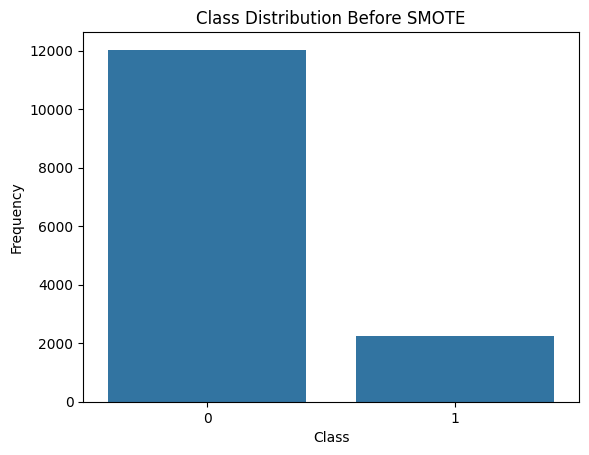

SMOTE class distribution: Counter({0: 12036, 1: 12036})


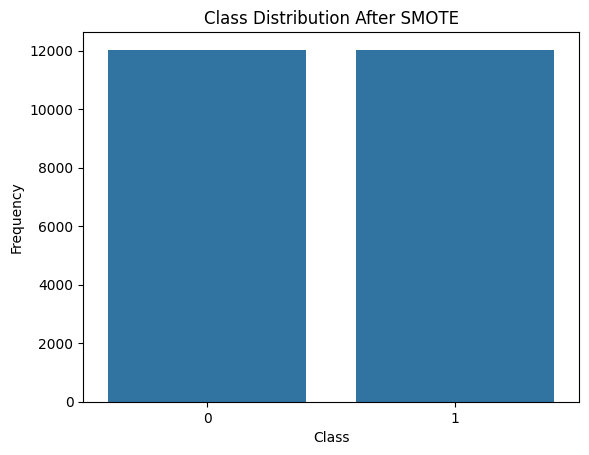

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to plot class distribution
def plot_class_distribution(y, title):
    counter = Counter(y)
    sns.barplot(x=list(counter.keys()), y=list(counter.values()))
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

# Your original code
print("Original class distribution:", Counter(y_train))
plot_class_distribution(y_train, 'Class Distribution Before SMOTE')

# Assuming X_resampled_smote and y_resampled_smote are already defined
print("SMOTE class distribution:", Counter(y_resampled_smote))
plot_class_distribution(y_resampled_smote, 'Class Distribution After SMOTE')


### Logistic Regression

In [22]:
lr = LogisticRegression()
result = lr.fit(X_resampled_smote, y_resampled_smote)
y_pred = lr.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  58.04 %
Misclassification rate of this model:  41.96 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.871     0.589     0.703      3004
           1      0.197     0.537     0.288       564

    accuracy                          0.580      3568
   macro avg      0.534     0.563     0.495      3568
weighted avg      0.765     0.580     0.637      3568

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1768 |                 1236 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  261 |                  303 |
+-----------------+----------------------+----------------------+


### Decision Trees

In [ ]:
dt = DecisionTreeClassifier(random_state=28)
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'log2',None]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled_smote, y_resampled_smote)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)

{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8085808482614528


In [ ]:
dtree = DecisionTreeClassifier(max_depth = None,  min_samples_split = 2, min_samples_leaf = 2, max_features = None, random_state = 28)
dtree.fit(X_resampled_smote, y_resampled_smote)
y_pred = dtree.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  75.08 %
Misclassification rate of this model:  24.92 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.855     0.847     0.851      3004
           1      0.226     0.238     0.232       564

    accuracy                          0.751      3568
   macro avg      0.541     0.542     0.541      3568
weighted avg      0.756     0.751     0.753      3568

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 2545 |                  459 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  430 |                  134 |
+-----------------+----------------------+----------------------+


### Random Forest

In [ ]:
np.random.seed(28)

rf = RandomForestClassifier(random_state=28)
param_grid = {
    'n_estimators': [50, 80, 100, 120, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'log2',None]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled_smote, y_resampled_smote)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, random_state=28)
rf.fit(X_resampled_smote, y_resampled_smote)
y_pred = rf.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

### Ada boosting

In [ ]:
np.random.seed(28)

ada_classifier = AdaBoostClassifier(random_state=28)

param_grid = {
    'n_estimators': [50, 80, 100, 120, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_resampled_smote, y_resampled_smote)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 0.6799187123399604


In [ ]:
ada_classifier = AdaBoostClassifier(n_estimators=150, learning_rate= 1.0, algorithm='SAMME.R', random_state=28)

ada_classifier.fit(X_resampled_smote, y_resampled_smote)

y_pred_ada = ada_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_ada) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_ada) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_ada, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_ada)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

### Gradient Boosting

In [23]:
np.random.seed(28)

gb_classifier = GradientBoostingClassifier(random_state=28)

param_grid = {
    'n_estimators': [50, 80, 100, 120, 150, 200,None],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, None],
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_resampled_smote, y_resampled_smote)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best Score: 0.878043151227749


In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth = 5, random_state=28)
gb_classifier.fit(X_resampled_smote, y_resampled_smote)
y_pred = gb_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

### Multilayer Perceptron

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled_smote)
X_test_scaled = scaler.transform(X_test)
#(X_resampled_smote, y_resampled_smote)

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',alpha=0.0001, max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_resampled_smote)
y_pred = mlp.predict(X_test_scaled)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  75.76 %
Misclassification rate of this model:  24.24 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.866     0.843     0.854      3004
           1      0.267     0.305     0.285       564

    accuracy                          0.758      3568
   macro avg      0.566     0.574     0.569      3568
weighted avg      0.771     0.758     0.764      3568

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 2531 |                  473 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  392 |                  172 |
+-----------------+----------------------+----------------------+


### k Nearest Neighbours

In [26]:


np.random.seed(28)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_resampled_smote, y_resampled_smote)


# Display best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.8097789287993095


In [ ]:
# Use the best estimator from GridSearchCV to predict on test data
knn_classifier = grid_search.best_estimator_
knn_classifier.fit(X_resampled_smote, y_resampled_smote)
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy and misclassification rate
accuracy = round(metrics.accuracy_score(y_test, y_pred_knn) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_knn) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))

# Print confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

### Support Vector Machines

In [ ]:
np.random.seed(28)

# Initialize SVM classifier
svm_classifier = SVC(random_state=28)

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_resampled_smote, y_resampled_smote)

# Display best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
# Use the best estimator from GridSearchCV to predict on test data
svm_classifier = grid_search.best_estimator_
svm_classifier.fit(X_resampled_smote, y_resampled_smote)
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy and misclassification rate
accuracy = round(metrics.accuracy_score(y_test, y_pred_svm) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_svm) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))

# Print confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

### Naive Bias

In [ ]:
np.random.seed(28)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Define parameter grid for Naive Bayes (even though GaussianNB has few hyperparameters)
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_resampled_smote, y_resampled_smote)
# Display best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# Use the best estimator from GridSearchCV to predict on test data
nb_classifier = grid_search.best_estimator_
nb_classifier.fit(X_resampled_smote, y_resampled_smote)

y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy and misclassification rate
accuracy = round(metrics.accuracy_score(y_test, y_pred_nb) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_nb) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_nb, digits=3))

# Print confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)